In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('data.csv')
df.head()


,Unnamed: 0,room_numbers,class,lift,parking,square,price
0,0,2,IV класс (эконом),1–3 лифта (1–2 грузопассажирских и легковой),отсутствует,70.09,24328200
1,1,3,IV класс (эконом),1–3 лифта (1–2 грузопассажирских и легковой),отсутствует,91.19,31500300
2,0,1,III класс (комфорт),"пассажирские, грузовые","надземный (1-уровневый, отапливаемый, 140 маши...",45.11,11460000
3,1,2,III класс (комфорт),"пассажирские, грузовые","надземный (1-уровневый, отапливаемый, 140 маши...",67.24,13827200
4,2,3,III класс (комфорт),"пассажирские, грузовые","надземный (1-уровневый, отапливаемый, 140 маши...",89.42,24455700


In [41]:
df = df.drop('Unnamed: 0', 1)
df['class'].unique()

/var/folders/r2/7jjjm0hx1z1fdbvdgwzd46300000gn/T/ipykernel_1535/3083491476.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df = df.drop('Unnamed: 0', 1)


array(['IV класс (эконом)', 'III класс (комфорт)', 'комфорт +',
       'II класс (бизнес)', 'I класс (элит)'], dtype=object)

In [42]:
classes = df['class'].unique()
df['lift'] = np.where(df['lift']=='отсутствует', 0, 1)
df['parking'] = np.where(df['parking']=='отсутствует', 0, 1)
df.head()

,room_numbers,class,lift,parking,square,price
0,2,IV класс (эконом),1,0,70.09,24328200
1,3,IV класс (эконом),1,0,91.19,31500300
2,1,III класс (комфорт),1,1,45.11,11460000
3,2,III класс (комфорт),1,1,67.24,13827200
4,3,III класс (комфорт),1,1,89.42,24455700


In [43]:
from sklearn.preprocessing import LabelEncoder

print(df['class'].unique())

label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])
# Print sample of dataset
print(df['class'].unique())

df.head()


['IV класс (эконом)' 'III класс (комфорт)' 'комфорт +' 'II класс (бизнес)'
 'I класс (элит)']
[3 2 4 1 0]


,room_numbers,class,lift,parking,square,price
0,2,3,1,0,70.09,24328200
1,3,3,1,0,91.19,31500300
2,1,2,1,1,45.11,11460000
3,2,2,1,1,67.24,13827200
4,3,2,1,1,89.42,24455700


In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

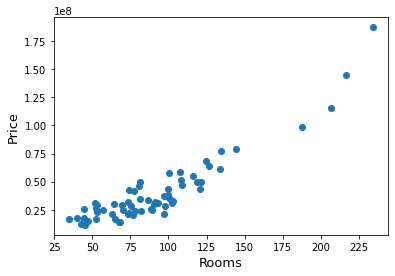

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = df['square'], y = df['price'])
plt.ylabel('Price', fontsize=13)
plt.xlabel('Rooms', fontsize=13)
plt.show()

<AxesSubplot:>

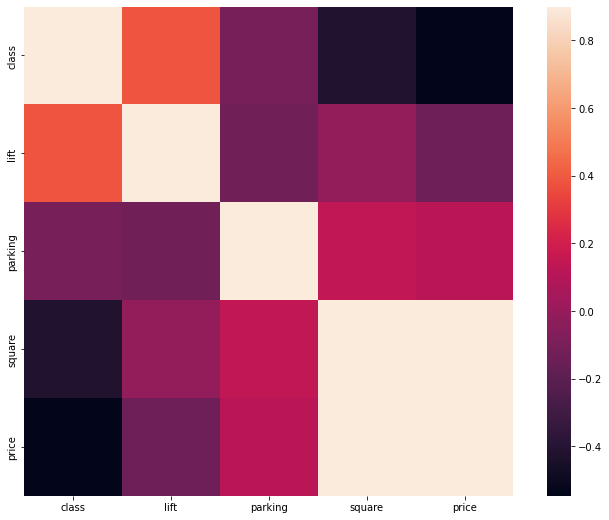

In [15]:
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
df.isna().any()

room_numbers    False
class           False
lift            False
parking         False
square          False
price           False
dtype: bool

/var/folders/r2/7jjjm0hx1z1fdbvdgwzd46300000gn/T/ipykernel_1535/2910554080.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('price', 1), df['price'], test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error


In [19]:
df['square'] = df['square'].astype('float')

df['price'] = df['price'].astype('float')

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

X = df.drop('price', 1)
Y = df['price']

X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

/var/folders/r2/7jjjm0hx1z1fdbvdgwzd46300000gn/T/ipykernel_1535/292033537.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('price', 1)


LinearRegression()

In [24]:
y_pred = lr.predict(X_test)

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

12622678.817606704

In [27]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test, y_pred)

0.37255657454759095

In [28]:
lr.score(X_test, y_test)

0.8675966248630633

In [29]:
from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
clf.fit(X_train, y_train)

/Users/sherkhankhanseiit/PycharmProjects/parsingRealEstate/venv/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:294: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=400)

In [30]:
clf.score(X_test, y_test)



0.9339020653773694

In [31]:
y_pred2 = clf.predict(X_test)
mean_absolute_percentage_error(y_test, y_pred2)

0.16437503377936943

In [36]:
import joblib
joblib.dump(clf, 'trained_model.pkl', compress=9)

['trained_model.pkl']

In [38]:
clf = joblib.load('trained_model.pkl')
# Make predictions on the loaded pre-trained model
mean_absolute_percentage_error(y_test, clf.predict(X_test))

0.16437503377936943